<a href="https://colab.research.google.com/github/navyavemavarapu/Serie-A_Stats/blob/main/Serie_A_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data

Here i am going to build a linear regression model to predict the final rank of the squad by analysing all the features.                                   
Data link(2021-2022 Serie A Stats) - https://fbref.com/en/comps/11/Serie-A-Stats

In [2]:
df=pd.read_excel("/content/SerieA_data.xlsx")

In [3]:
df.head()

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Milan,38,26,8,4,69,31,38,86,2.26,63.1,34.8,28.3,0.74,44015,"Olivier Giroud, Rafael Leão - 11",Mike Maignan,→ Champions League via league finish
1,2,Inter,38,25,9,4,84,32,52,84,2.21,81.4,39.2,42.2,1.11,44473,Lautaro Martínez - 21,Samir Handanović,→ Champions League via league finish
2,3,Napoli,38,24,7,7,74,31,43,79,2.08,59.4,31.9,27.6,0.73,28119,Victor Osimhen - 14,David Ospina,→ Champions League via league finish
3,4,Juventus,38,20,10,8,57,37,20,70,1.84,51.5,38.0,13.4,0.35,22621,Paulo Dybala - 10,Wojciech Szczęsny,→ Champions League via league finish
4,5,Lazio,38,18,10,10,77,58,19,64,1.68,55.8,48.3,7.6,0.20,23263,Ciro Immobile - 27,Thomas Strakosha,→ Europa League via league finish


In [4]:
df['MP'].value_counts()

38    20
Name: MP, dtype: int64

Total number of matches played by each squad is 38

In [5]:
df.shape

(20, 19)

# Dropping unwanted columns

In [6]:
df.drop(['Top Team Scorer','Goalkeeper','Notes','MP'],axis=1,inplace=True)

In [7]:
df.head(3)

,Rk,Squad,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance
0,1,Milan,26,8,4,69,31,38,86,2.26,63.1,34.8,28.3,0.74,44015
1,2,Inter,25,9,4,84,32,52,84,2.21,81.4,39.2,42.2,1.11,44473
2,3,Napoli,24,7,7,74,31,43,79,2.08,59.4,31.9,27.6,0.73,28119


# Data cleaning

In [8]:
df.isnull().sum() # no null values

Rk            0
Squad         0
W             0
D             0
L             0
GF            0
GA            0
GD            0
Pts           0
Pts/MP        0
xG            0
xGA           0
xGD           0
xGD/90        0
Attendance    0
dtype: int64

In [9]:
df.duplicated().sum() # no duplicates

0

In [10]:
df.dtypes # data is strctured

Rk              int64
Squad          object
W               int64
D               int64
L               int64
GF              int64
GA              int64
GD              int64
Pts             int64
Pts/MP        float64
xG            float64
xGA           float64
xGD           float64
xGD/90        float64
Attendance      int64
dtype: object

# Visualizing

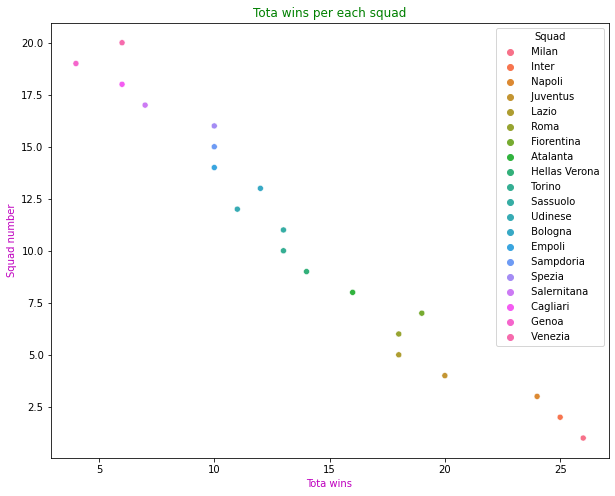

In [11]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x='W',y='Rk',hue='Squad')
plt.title("Tota wins per each squad",color='g')
plt.xlabel("Tota wins",color='m')
plt.ylabel("Squad number",color='m')
plt.show()

As the number of wins decreases, rank increases, which is in line with our general knowledge

# EDA

Finding correlations with heat map

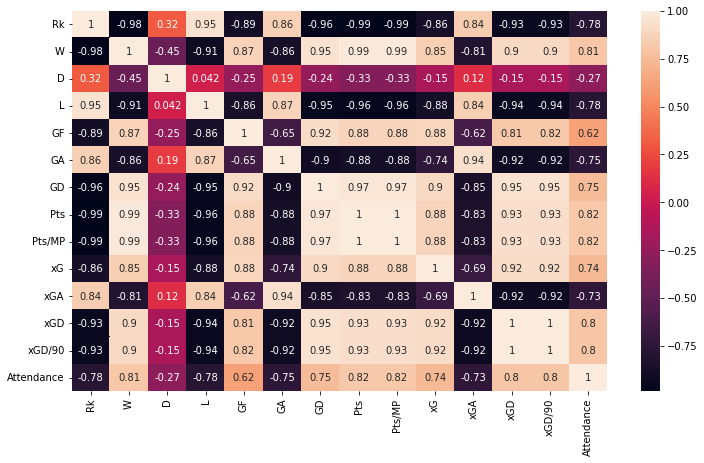

In [12]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True)

From heat map, we can see that rank has linear relation ship with all the other features, so we can go ahead a build linear regg model to this data. No transformation of features is required(-0.2<corr<0.2 ==> No linear relationship)

# Data preparation

In [13]:
df.columns

Index(['Rk', 'Squad', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP', 'xG',
       'xGA', 'xGD', 'xGD/90', 'Attendance'],
      dtype='object')

In [14]:
input_cols = list(df.columns[2:])
target_col ='Rk'

In [15]:
print("Feature columns are:",input_cols)
print("Target column is:",target_col)

Feature columns are: ['W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP', 'xG', 'xGA', 'xGD', 'xGD/90', 'Attendance']
Target column is: Rk


In [16]:
X = df[input_cols]
y = df[target_col]

In [17]:
#Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [18]:
y_test

12    13
4      5
18    19
0      1
Name: Rk, dtype: int64

In [19]:
X_train.shape, X_test.shape

((16, 13), (4, 13))

# Scaling/normalising the data

In [20]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialise
scaler.fit(X_train) # find the values of mu and sigma
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)  

In [21]:
scaler.var_

array([3.36093750e+01, 5.62500000e+00, 3.13593750e+01, 2.06250000e+02,
       2.13589844e+02, 7.26277344e+02, 2.84484375e+02, 1.96210938e-01,
       1.47437773e+02, 1.67257344e+02, 5.33306094e+02, 3.69230859e-01,
       1.36827333e+08])

In [22]:
X_test_scaled

array([[-0.32342311,  0.21081851,  0.24553816, -0.73112616, -0.02138256,
        -0.37802139, -0.30385379, -0.30759191, -0.62436196,  0.13821445,
        -0.4054185 , -0.41245388, -0.21551408],
       [ 0.71153085,  0.21081851, -0.82590109,  1.5666989 ,  0.18389003,
         0.73517043,  0.76334001,  0.75345907,  0.33920407, -0.31798989,
         0.36103356,  0.36102572,  0.56286924],
       [-1.70336173,  2.74064064,  0.60268458, -1.91485422,  0.32073842,
        -1.19436206, -1.3710476 , -1.36864289, -1.14320521, -0.06282475,
        -0.56563729, -0.560567  , -0.37213113],
       [ 2.09146947, -0.63245553, -1.89734034,  1.0096504 , -1.66356326,
         1.44019192,  2.067688  ,  2.06284114,  0.94040338, -1.36184728,
         1.25739274,  1.2497044 ,  2.33695058]])

# Modelling

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [24]:
regressor.intercept_ # c

10.75000000000002

In [25]:
coeff_df = pd.DataFrame(regressor.coef_,input_cols, columns=['Coefficient'])
coeff_df

,Coefficient
W,1.067413
D,-0.101787
L,-1.061933
GF,-0.569133
GA,-1.951597
GD,0.755058
Pts,1.086351
Pts/MP,-9.080554
xG,-31.586690
xGA,36.069620


**Feature importance**                                                        
The feature which has higest modulus coefficient is the best feature. Here xGD/90 plays major role in predicting final rank of squad than other features.

In [26]:
y_pred = regressor.predict(X_test_scaled)

In [27]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
12,13,12.106385
4,5,5.506471
18,19,18.576424
0,1,-0.450786


# Evaluation metric

In [29]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9828756042574903


This is very good model

# Predicting

Let’s see if it can properly guess, at what position Roma finished its 2019/2020 season.

In [31]:
regressor.predict(scaler.transform([[21,7,10,77,51,26,70,1.84,72.6,48.3,24.3,0.64,26956]]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([4.66383452])

Quite good!! Roma's final position was 5 in 2019/2020 season.